# ANALYSIS OF COVID-19 DISEASE IN SPAIN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Observed deaths vs. predicted deaths

In [2]:
path="Dataset\\Momo_CCAA_2018_2020.csv"

In [3]:
data=pd.read_csv(path)

In [4]:
data.head()

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
0,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-24,1017,1017.0,1017.0,1014.0,924.05,1127.20
1,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-25,965,965.0,965.0,1014.0,912.60,1127.20
2,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-26,1013,1013.0,1013.0,1014.5,912.60,1101.85
3,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-27,1051,1051.0,1051.0,1015.5,912.60,1101.85
4,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-28,962,962.0,962.0,1014.5,915.90,1079.80


In [5]:
data.shape

(179760, 15)

In [6]:
#Total number of death (observed and predicted)
datos_nacionales=data[(data["ambito"]=="nacional") & (data["nombre_gedad"]=="todos") & (data["cod_sexo"]=="all") 
& (data["nombre_sexo"]=="todos")]
datos_nacionales.shape

(749, 15)

In [7]:
datos_nacionales.dtypes

ambito                             object
cod_ambito                         object
cod_ine_ambito                    float64
nombre_ambito                      object
cod_sexo                           object
nombre_sexo                        object
cod_gedad                          object
nombre_gedad                       object
fecha_defuncion                    object
defunciones_observadas              int64
defunciones_observadas_lim_inf    float64
defunciones_observadas_lim_sup    float64
defunciones_esperadas             float64
defunciones_esperadas_q01         float64
defunciones_esperadas_q99         float64
dtype: object

In [8]:
#changing the data type, date
datos_nacionales["fecha_defuncion"]=pd.to_datetime(datos_nacionales["fecha_defuncion"])

In [9]:
datos_nacionales.dtypes

ambito                                    object
cod_ambito                                object
cod_ine_ambito                           float64
nombre_ambito                             object
cod_sexo                                  object
nombre_sexo                               object
cod_gedad                                 object
nombre_gedad                              object
fecha_defuncion                   datetime64[ns]
defunciones_observadas                     int64
defunciones_observadas_lim_inf           float64
defunciones_observadas_lim_sup           float64
defunciones_esperadas                    float64
defunciones_esperadas_q01                float64
defunciones_esperadas_q99                float64
dtype: object

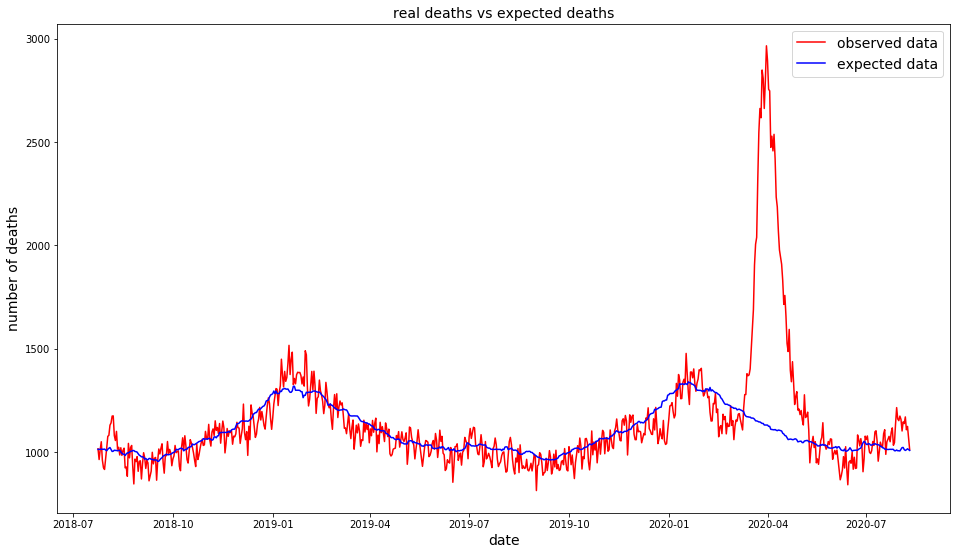

In [10]:
x=datos_nacionales["fecha_defuncion"]
y=datos_nacionales["defunciones_observadas"]
y1=datos_nacionales["defunciones_esperadas"]
fig, ax=plt.subplots(figsize=(16,9))
ax.plot(x,y,'r',label="observed data")
ax.plot(x,y1,'b',label="expected data")
ax.set_xlabel("date").set_fontsize(14)
ax.set_ylabel("number of deaths").set_fontsize(14)
ax.set_title("real deaths vs expected deaths").set_fontsize(14)
ax.legend(prop={"size":14})

## analysis of the evolution of covid-19 in spain

In [11]:
#dataset path, confirmed cases
path1="Dataset\\time_series_covid19_confirmed_global.csv"
#dataset path, deaths number
path2="Dataset\\time_series_covid19_deaths_global.csv"
#dataset path, recovered cases
path3="Dataset\\time_series_covid19_recovered_global.csv"

In [12]:
data_confirmed=pd.read_csv(path1)
Data_Confirmed_Spain=data_confirmed[data_confirmed["Country/Region"]=="Spain"]
data_deaths=pd.read_csv(path2)
Data_Deaths_Spain=data_deaths[data_deaths["Country/Region"]=="Spain"]
data_recovered=pd.read_csv(path3)
Data_Recovered_Spain=data_recovered[data_recovered["Country/Region"]=="Spain"]

In [13]:
#List with date (removing first 4 rows)
date_value_list=data_confirmed.columns.values.tolist()
date_value=date_value_list[4:]
#List of confirmed cases (removing first 4 rows)
confirmed_value=Data_Confirmed_Spain.iloc[0,4:].tolist()
#List of deaths number (removing first 4 rows)
deaths_value=Data_Deaths_Spain.iloc[0,4:].tolist()
#List of recovered number (removing first 4 rows)
recovered_value=Data_Recovered_Spain.iloc[0,4:].tolist()
(len(date_value),len(confirmed_value),len(deaths_value),len(recovered_value))

(217, 217, 217, 217)

In [14]:
Spain_Data=pd.DataFrame({
    "Date":date_value,
    "Total Confirmed":confirmed_value,
    "Total Deaths":deaths_value,
    "Total Recovered":recovered_value
})

In [15]:
#changing the data type, date
Spain_Data["Date"]=pd.to_datetime(Spain_Data["Date"])

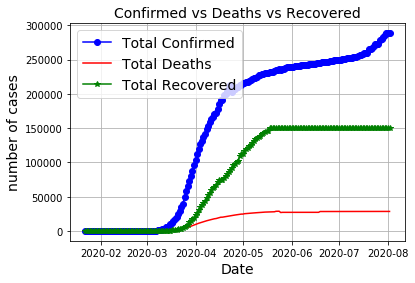

In [16]:
#It's intended to work with the data until the beginning of August, analyzing only the first wave
x=Spain_Data["Date"][0:194]
y=Spain_Data["Total Confirmed"][0:194]
y1=Spain_Data["Total Deaths"][0:194]
y2=Spain_Data["Total Recovered"][0:194]

fig, ax=plt.subplots()
ax.grid(True)
ax.plot(x,y,'-ob', label="Total Confirmed")
ax.plot(x,y1,'r', label="Total Deaths")
ax.plot(x,y2,'-*g',label="Total Recovered")
ax.set_xlabel("Date").set_fontsize(14)
ax.set_ylabel("number of cases").set_fontsize(14)
ax.set_title("Confirmed vs Deaths vs Recovered").set_fontsize(14)
ax.legend(prop={"size":14})

## Analysis of the evolution of the pandemic vs healthcare resources in Spain

In [17]:
#Creation of a list with values of the number of beds in hospitals, UCI beds in hospitals and number of health professionals
List_one=np.ones(len(x))
n_beds=138368
n_beds_uci=(9.7*47329981)/100000
n_profecionals_nurses=245533
n_profecionals_doctors=178600

Text(2020-03-22 00:00:00, 65719, 'critical point')

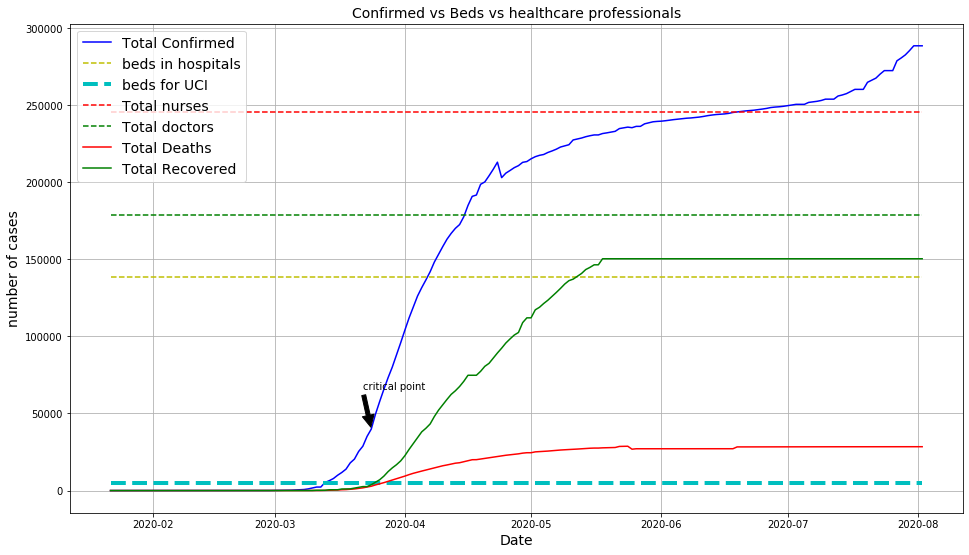

In [18]:
fig, ax=plt.subplots(figsize=(16,9))
ax.grid(True)
ax.plot(x,y,'b', label="Total Confirmed")
ax.plot(x,n_beds*List_one,'--y', label="beds in hospitals")
ax.plot(x,n_beds_uci*List_one,'--c', label="beds for UCI",linewidth=4)
ax.plot(x,n_profecionals_nurses*List_one,'--r',label="Total nurses")
ax.plot(x,n_profecionals_doctors*List_one,'--g',label="Total doctors")
ax.plot(x,y1,'r', label="Total Deaths")
ax.plot(x,y2,'-g',label="Total Recovered")
ax.set_xlabel("Date").set_fontsize(14)
ax.set_ylabel("number of cases").set_fontsize(14)
ax.set_title("Confirmed vs Beds vs healthcare professionals").set_fontsize(14)
ax.legend(prop={"size":14})
plt.annotate('critical point', xy=(x[62], y[62]), xytext=(x[60], y[65]),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

## analyzing the most important decisions made by the Spanish government

In [19]:
Dic_Decision_Spain=pd.DataFrame({
    "Date":["14-03-2020","29-03-2020","21-04-2020","23-05-2020","26-05-2020","21-06-2020","07-07-2020"],
    "acronym_Decision":["AS","CNEW","CU14","TBC","SEC","NN","ETWQ"],
    "Meaning":["Alarm Status","Confinement Non-Essential Workers",
    "Children Under 14 Can go Out","Total Border Closure","Start End Confinement",
    "Nueva Normalidad","Entry of Travelers Without Quarantine"]
})


In [20]:
Dic_Decision_Spain["Date"]=pd.to_datetime(Dic_Decision_Spain["Date"])

In [21]:
Dic_Decision_Spain.dtypes

Date                datetime64[ns]
acronym_Decision            object
Meaning                     object
dtype: object

In [22]:
num=np.ones(len(Dic_Decision_Spain["Date"]))

In [23]:
Dic_Decision_Spain

,Date,acronym_Decision,Meaning
0,2020-03-14,AS,Alarm Status
1,2020-03-29,CNEW,Confinement Non-Essential Workers
2,2020-04-21,CU14,Children Under 14 Can go Out
3,2020-05-23,TBC,Total Border Closure
4,2020-05-26,SEC,Start End Confinement
5,2020-06-21,NN,Nueva Normalidad
6,2020-07-07,ETWQ,Entry of Travelers Without Quarantine


In [24]:
#It's necesary to analyze the data per day, and not the number of confirmed cases accumulated
daily=[]
n=len(x)
list_y=y.tolist()
for i in range(n):
    rest=list_y[n-1]-list_y[n-2]
    daily.append(rest)
    n=n-1
len(daily)

194

In [25]:
daily.reverse()
for n, i in enumerate(daily):
    if i<0:
        daily[n]=0

In [26]:
round(np.mean(daily),2)

1540.87

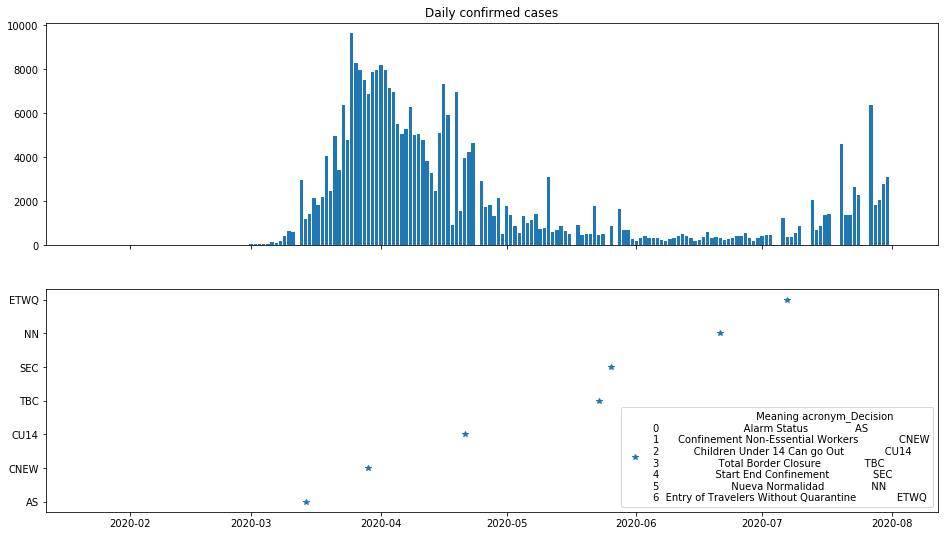

In [27]:
xd=Dic_Decision_Spain["Date"]
yd=Dic_Decision_Spain["acronym_Decision"]
c=Dic_Decision_Spain[["Meaning","acronym_Decision"]]
fig, (ax1,ax2)=plt.subplots(2,1,sharex=True, figsize=(16,9))
ax1.bar(x, daily)
ax1.set_title("Daily confirmed cases")
ax2.plot(xd, yd,'*', label=c)
plt.legend(loc='lower right')

# Data analysis European countries and South Korea, Regarding health resources 

### Countries analized: Spain; Italy; France; Germany; Sweden; Korea, South; Portugal; United Kindom 

In [28]:
### Health resources of each country
#No. of beds, No. ICU beds, No. nursing professionals, No. of professional doctors
##Other factors analyzed
#No. inhabitants over 65 years, No. inhabitants between 15 to 65 years, No. inhabitants under 15 years,Average age, Life expectancy, No. vaccinated, population density
#Resource DataFrames
def Resourses_Country(pd):
    Dic_Resourses_Country=pd.DataFrame({
        "Country":["Spain", "Italy", "France", "Germany", "Sweden", "Korea, South", "Portugal", "United Kingdom"],
        "No. of beds": [138368,194065,408245,664364,23904,593860,34890,169995],
        "No. of UCI beds": [4591,5217,10882,32870,591,7746,434,6865],
        "No. nursing_prof": [245533,330602,660611,1033000,108399,0,65135,514850],
        "No. doctor_prof": [178600,233102,222406,338129,41848,122387,47792,179162],
        "population":[46440099,60665551,66759950,82175684,9851017, 51640000,10341330,65382556],
        "No. pop > 65 years": [8992696,13346421,12684391,17256894,1970203,5164000,2171679,11768860],
        "No. pop between 15_65 years":[31237787,38825953,42058769,54235951,6206141,37180800,6721864,41844836],
        "No. pop < 15 years":[7099497, 8493177,12016791,10682839,1674673,9295200,1447786,11768860],
        "Average age": [43,46,41,46,41,42,44,40],
        "Life expectancy": [83, 83, 82, 81, 82, 79, 81, 81],
        "No. vaccinated > 65 years": [5035909,7407264,6151930,6574877,985102,0,1105385,8567730],
        "population density (pop/km2)":[94,200,122,233,23,515,112,275]
    })

    return Dic_Resourses_Country

#Function that contains the decision made by the government of the 8 countries analyzed
#[Spain; Italy; France; Germany; Sweden; Korea, South; Portugal; United Kindom]
def decision_taken(Country,pd):
    if Country=="Spain":
        Dic_Decision_Country=pd.DataFrame({
            "Date":["14-03-2020","29-03-2020","21-04-2020","23-05-2020","26-05-2020","21-06-2020","07-07-2020"],
            "acronym_Decision":["AS","CNEW","CU14","TBC","SEC","NN","ETWQ"],
            "Meaning":["Alarm Status","Confinement Non-Essential Workers",
                "Children Under 14 Can go Out","Total Border Closure","Start End Confinement",
                "Nueva Normalidad","Entry of Travelers Without Quarantine"]})
    elif Country=="Italy":
        Dic_Decision_Country=pd.DataFrame({
            "Date":["3-10-20","4-8-20","5-3-20","5-18-20","6-15-20","6-8-20","7-23-20"],
            "acronym_Decision":["Lockd","ZDiv","LockEnd","Reopening","AppMobil","IncRes","MassTrack"],
            "Meaning":["lockdown beginning","Zonal Division",
                "lockdown End","Reopening establishments and Europe","Mobile App available",
                "Increase Health Resources","mass tracking"]
            })
    elif Country=="France":
        Dic_Decision_Country=pd.DataFrame({
            "Date":["3-18-20","5-7-20","5-11-20","5-18-20","6-2-20","6-15-20","6-22-20","7-1-20"],
            "acronym_Decision":["Lockd","ZDiv","LockEnd","ReopeningI","AppMobil","ReopeningII",
                "ReopeningIII",   "ReopeningIV"],
            "Meaning":["lockdown beginning","Zonal Division",
                "lockdown End","School reopening green areas","Mobile App available",
                "Reopening borders Europe","Reopening schools, cinemas, casinos","Total Borders Reopening"]
            })
    elif Country=="Germany":
        Dic_Decision_Country=pd.DataFrame({
            "Date":["3-13-20","3-28-20","3-22-20","3-25-20","5-4-20","5-26-20","06-16-20"],
            "acronym_Decision":["PSS","TMFDS","MeasurRest","IncrMon","SchoolsReop","SelTest","AppMobil"],
            "Meaning":["Professional Sports Suspension","MFDS Takeover",
                "Restrictive Measures","Increased Monitoring","Schools reopening",
                "Selective testing","Mobile App available"]
            })
    elif Country=="Sweden":
        Dic_Decision_Country=pd.DataFrame({
            "Date":["3-13-20","3-30-20"],
            "acronym_Decision":["SelMon","PrecautioSS"],
            "Meaning":["Selective Monitoring","Precaution Selective Sector"]
            })
    elif Country=="Korea, South":
        Dic_Decision_Country=pd.DataFrame({
            "Date":["2-2-20","2-13-20","2-23-20"],
            "acronym_Decision":["SelCon","AppMobil","SelQuar"],
            "Meaning":["Selective Control","Mobile App available","Selective Quarantine"]
            })
    elif Country=="Portugal":
        Dic_Decision_Country=pd.DataFrame({
            "Date":["3-18-20","5-2-20","7-10-20"],
            "acronym_Decision":["Lockd","LockEnd","IncrTestMonit"],
            "Meaning":["lockdown beginning","lockdown End",
            "Increased Testing and Monitoring"]
            })
    elif Country=="United Kingdom":
        Dic_Decision_Country=pd.DataFrame({
            "Date":["3-13-20","4-29-20","6-8-20","6-19-20"],
            "acronym_Decision":["VolIsol","SelTest","IsolTrav","EmergStatDec"],
            "Meaning":["Voluntary Isolation","Selective Testing",
            "Isolation Travelers","Emergency Status Decrease"]
            })

    return Dic_Decision_Country


#This is a function that could give a representation of all the graphic showing before, but for the diferent country
#It's possible to use the function directly without executing the previous cells
#[Spain; Italy; France; Germany; Sweden; Korea, South; Portugal; United Kindom]
def global_analisys(Country,Health_resources_representation=False,Decisions_representation=False):
    
    ##
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from datetime import datetime
    ##
    #dataset path, confirmed cases
    path1="Dataset\\time_series_covid19_confirmed_global.csv"
    data_confirmed=pd.read_csv(path1)
    #dataset path, deaths number
    path2="Dataset\\time_series_covid19_deaths_global.csv"
    data_deaths=pd.read_csv(path2)
    #dataset path, recovered cases
    path3="Dataset\\time_series_covid19_recovered_global.csv"
    data_recovered=pd.read_csv(path3)

    #Call Resourses Country function
    Dic_Resourses_Country=Resourses_Country(pd)

    #To specify that you work with certain countries located in Europe, for the dataset used, 
    #it is necessary to specify, in addition to the name of the country, another variable. In this case latitude is used
    if Country=="France":
        Data_Confirmed_country=data_confirmed[(data_confirmed["Country/Region"]==Country) & (data_confirmed["Lat"]==46.2276)
            ]
        #Deaths
        Data_Deaths_country=data_deaths[(data_deaths["Country/Region"]==Country) & (data_confirmed["Lat"]==46.2276)]
        #Recovered 
        Data_Recovered_country=data_recovered[(data_recovered["Country/Region"]==Country) 
            & (data_recovered["Lat"]==46.227600)]

    elif Country=="United Kingdom":
        Data_Confirmed_country=data_confirmed[(data_confirmed["Country/Region"]==Country) & (data_confirmed["Lat"]==55.3781)
            ]
        #Deaths
        Data_Deaths_country=data_deaths[(data_deaths["Country/Region"]==Country) & (data_confirmed["Lat"]==55.3781)]
        #Recovered
        Data_Recovered_country=data_recovered[(data_recovered["Country/Region"]==Country) & (data_recovered["Lat"]==55.3781)
            ]
    else:
        Data_Confirmed_country=data_confirmed[data_confirmed["Country/Region"]==Country]
        #Deaths
        Data_Deaths_country=data_deaths[data_deaths["Country/Region"]==Country]
        #Recovered
        Data_Recovered_country=data_recovered[data_recovered["Country/Region"]==Country]

    ##
    #List with the date data without taking into account the first 4 columns
    date_value_list=data_confirmed.columns.values.tolist()
    date_value=date_value_list[4:]
    #Confirmed list
    confirmed_value=Data_Confirmed_country.iloc[0,4:].tolist()
    #List of deaths
    deaths_value=Data_Deaths_country.iloc[0,4:].tolist()
    #LRecovered list
    recovered_value=Data_Recovered_country.iloc[0,4:].tolist()

    ## Transformation into Data Frame, to work more easily
    Country_Data=pd.DataFrame({
        "Date":date_value,
        "Total Confirmed":confirmed_value,
        "Total Deaths":deaths_value,
        "Total Recovered":recovered_value
    })

    #transform date in datetime
    Country_Data["Date"]=pd.to_datetime(Country_Data["Date"])

    ## Pandemic evolution data
    x=Country_Data["Date"][0:194]
    y=Country_Data["Total Confirmed"][0:194]
    y1=Country_Data["Total Deaths"][0:194]
    y2=Country_Data["Total Recovered"][0:194]

    if Decisions_representation==False:
        if Health_resources_representation==False:
            fig, ax=plt.subplots(figsize=(16,9))
            ax.grid(True)
            ax.plot(x,y,'-ob', label="Total Confirmed ({})".format(int(y.max())))
            ax.plot(x,y1,'r', label="Total Deaths ({})".format(int(y1.max())))
            ax.plot(x,y2,'-*g',label="Total Recovered ({})".format(int(y2.max())))
            ax.set_xlabel("Date").set_fontsize(14)
            ax.set_ylabel("Number of cases").set_fontsize(14)
            ax.set_title("Confirmed vs Deaths vs Recovered "+"("+ Country+ ")").set_fontsize(14)
            ax.legend(prop={"size":14})
        else:
            #Representation of medical resources regarding the evolution of the pandemic
            List_one=np.ones(len(x))
            foco=Dic_Resourses_Country[Dic_Resourses_Country["Country"]==Country]
            n_beds=foco["No. of beds"]
            n_beds=list(map(lambda num: num*List_one, n_beds))
            n_beds=np.reshape(n_beds,(194,1))

            n_beds_uci=foco["No. of UCI beds"]
            n_beds_uci=list(map(lambda num: num*List_one, n_beds_uci))
            n_beds_uci=np.reshape(n_beds_uci,(194,1))

            n_prof_nursing=foco["No. nursing_prof"]
            n_prof_nursing=list(map(lambda num: num*List_one, n_prof_nursing))
            n_prof_nursing=np.reshape(n_prof_nursing,(194,1))

            n_prof_doctors=foco["No. doctor_prof"]
            n_prof_doctors=list(map(lambda num: num*List_one, n_prof_doctors))
            n_prof_doctors=np.reshape(n_prof_doctors,(194,1))

            fig, ax=plt.subplots(figsize=(16,9))
            ax.grid(True)
            ax.plot(x,y,'-ob', label="Total Confirmed ({})".format(int(y.max())))
            ax.plot(x,n_beds,'--y', label="No. of beds ({})".format(int(n_beds.max())))
            ax.plot(x,n_beds_uci,'--c', label="No. of UCI beds ({})".format(int(n_beds_uci.max())),linewidth=4)
            ax.plot(x,n_prof_nursing,'--r',
                label="Total nurses ({})".format(int(n_prof_nursing.max())))
            ax.plot(x, n_prof_doctors,'--g',label="Total doctors ({})".format(int(n_prof_doctors.max())))
            ax.plot(x,y1,'r', label="Total Deaths ({})".format(int(y1.max())))
            ax.plot(x,y2,'-*g',label="Total Recovered ({})".format(int(y2.max())))
            ax.set_xlabel("Date").set_fontsize(14)
            ax.set_ylabel("Number of cases").set_fontsize(14)
            ax.set_title("Confirmed vs Deats vs Recovered "+"("+ Country+ ")").set_fontsize(14)
            ax.legend(prop={"size":14})
           

    else:
        Dic_Decision_Country=decision_taken(Country,pd)
        Dic_Decision_Country["Date"]=pd.to_datetime(Dic_Decision_Country["Date"])
        num=np.ones(len(Dic_Decision_Country["Date"]))
        #Datos diarios
        daily=[]
        n=len(x)
        list_y=y.tolist()
        for i in range(n):
            rest=list_y[n-1]-list_y[n-2]
            daily.append(rest)
            n=n-1
        len(daily)

        daily.reverse()
        for n, i in enumerate(daily):
            if i<0:
                daily[n]=0

        xd=Dic_Decision_Country["Date"]
        yd=Dic_Decision_Country["acronym_Decision"]
        c=Dic_Decision_Country[["Meaning","acronym_Decision"]]
        fig, (ax1,ax2)=plt.subplots(2,1,sharex=True, figsize=(16,9))
        ax1.bar(x, daily)
        ax1.set_title("Daily confirmed cases ({})".format(Country))
        ax2.plot(xd, yd,'*', label=c)
        plt.legend(loc='lower right')

        return plt.show()


### use of the function
* if Decisions_representation it's going to show the graphic daily confirmed cases. 
* if you want to analyze the evolution of simple data or with health resources, Decisions_representation=False


### Italy

It does not have sufficient health resources to treat patients with covid-19 and those with other diseases

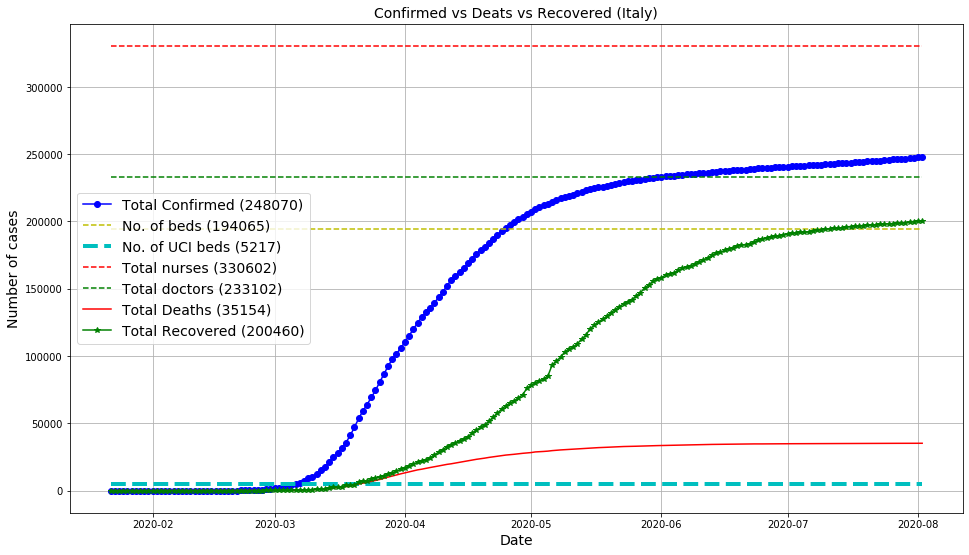

In [29]:
global_analisys("Italy",True)

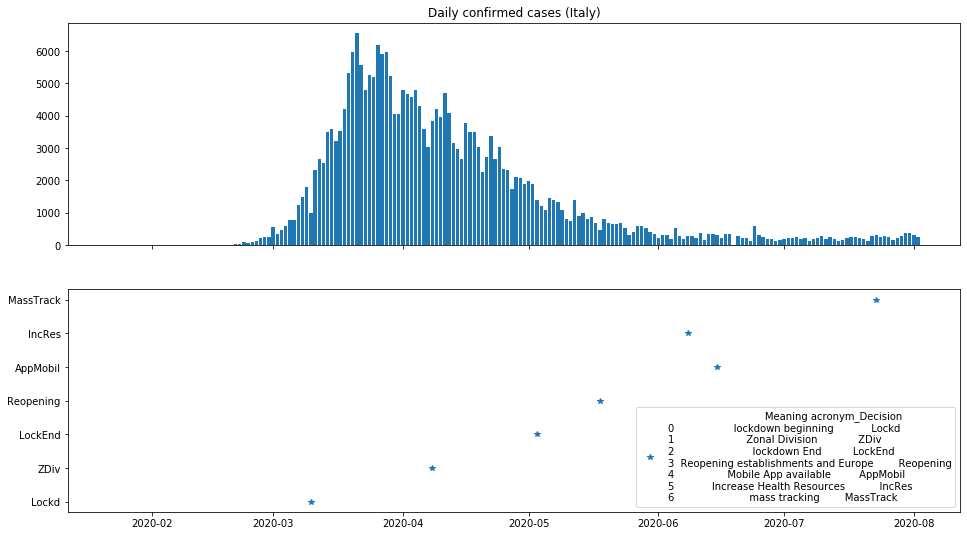

In [30]:
global_analisys("Italy",False,True)

### Germany

has sufficient health resources to treat patients with covid-19 and those with other diseases

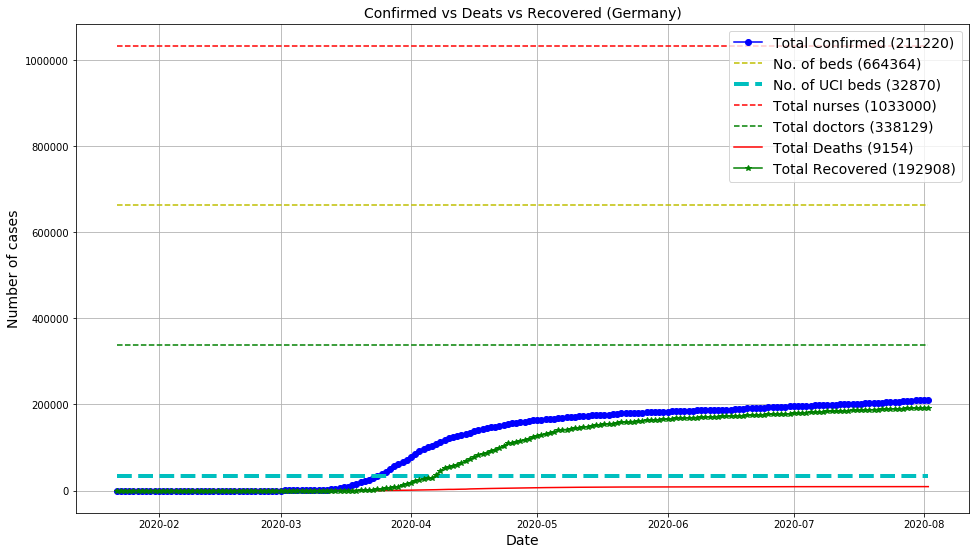

In [31]:
global_analisys("Germany",True)

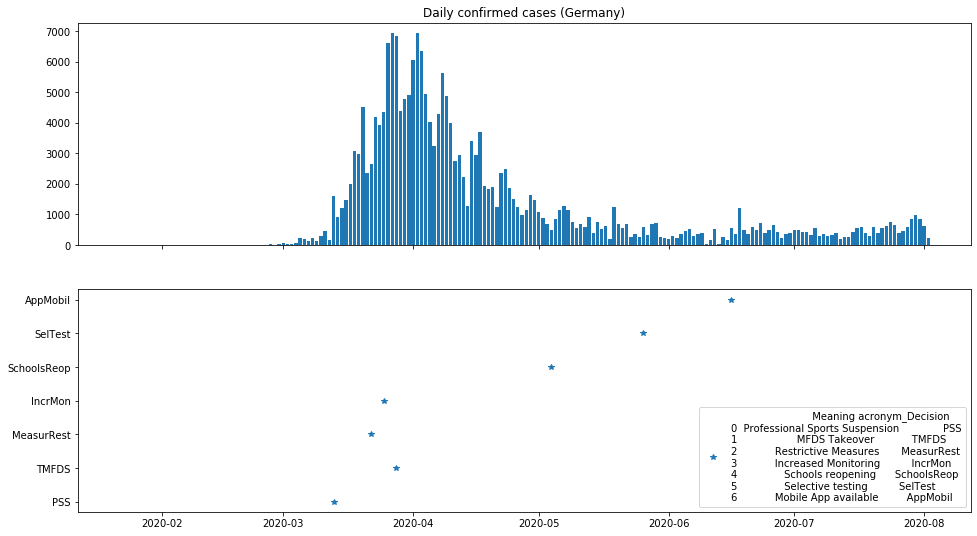

In [32]:
global_analisys("Germany",False,True)

### Sweden

It does not have sufficient health resources to treat patients with covid-19 and those with other diseases

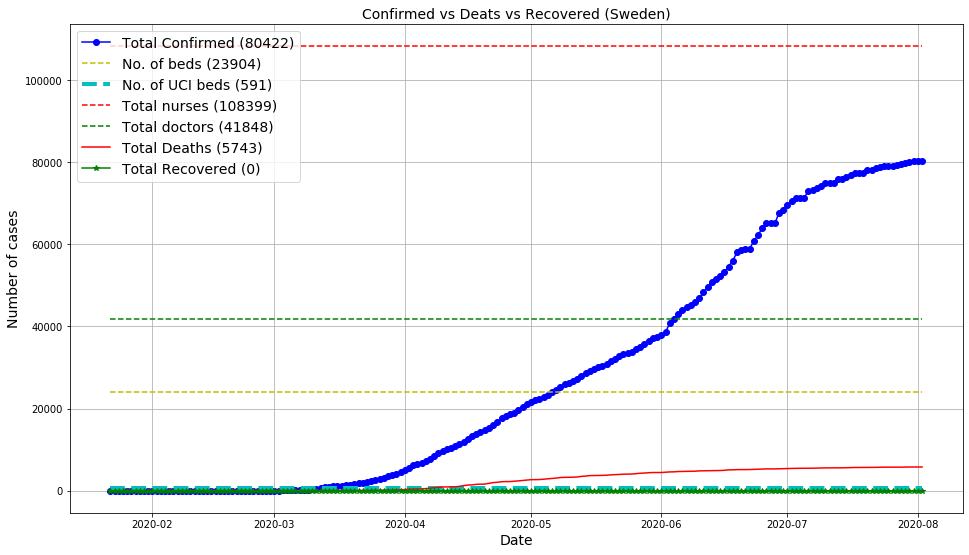

In [33]:
global_analisys("Sweden",True)

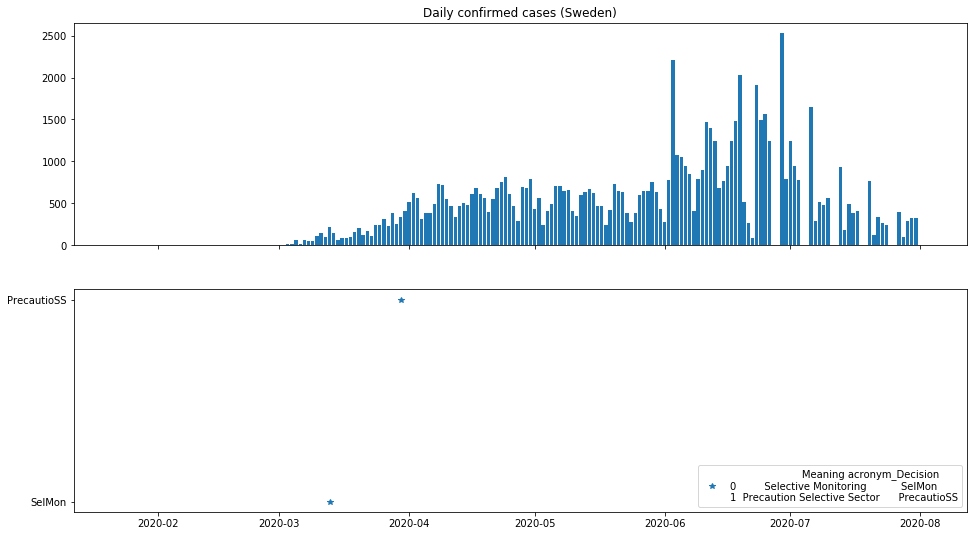

In [34]:
global_analisys("Sweden",False,True)

### France

It have sufficient health resources to treat patients with covid-19 and those with other diseases

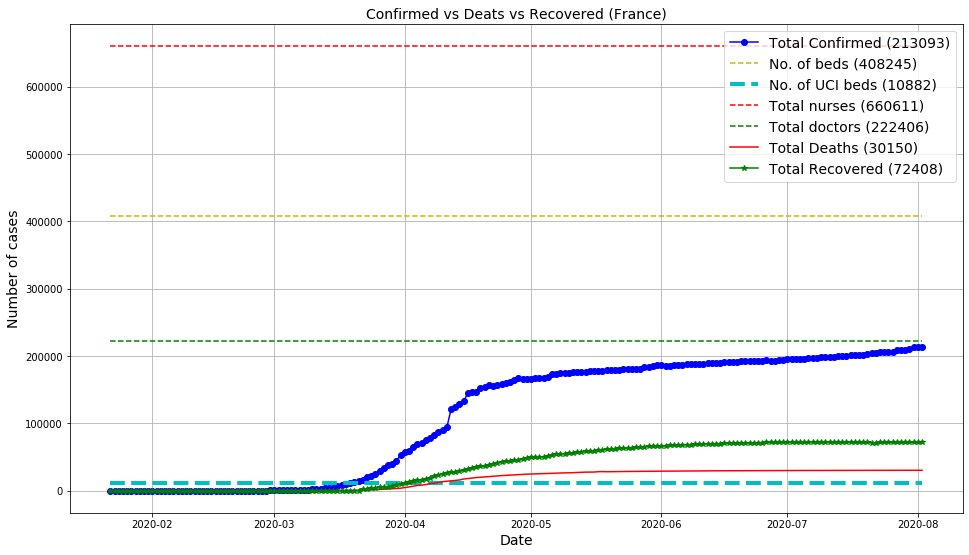

In [35]:
global_analisys("France",True)

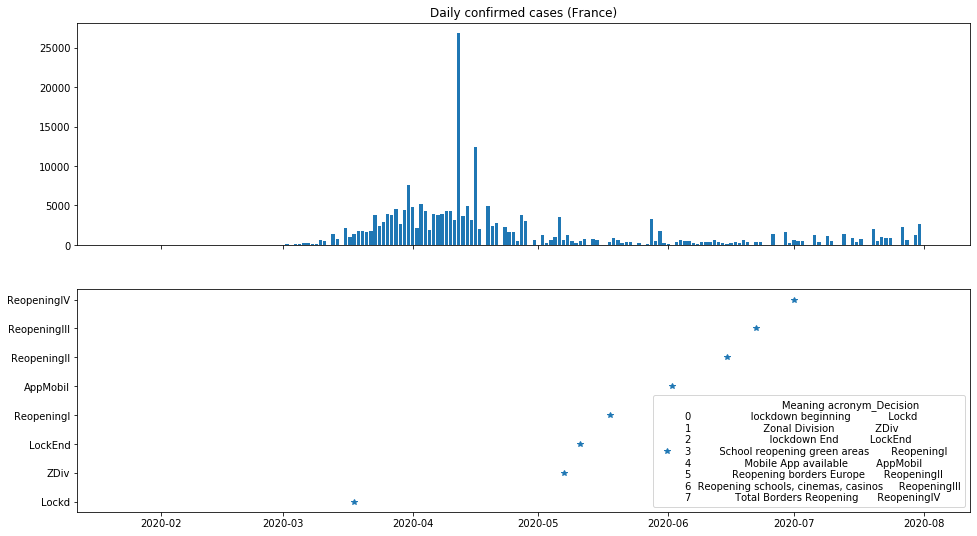

In [36]:
global_analisys("France",False,True)

### Korea, South

It have sufficient health resources to treat patients with covid-19 and those with other diseases

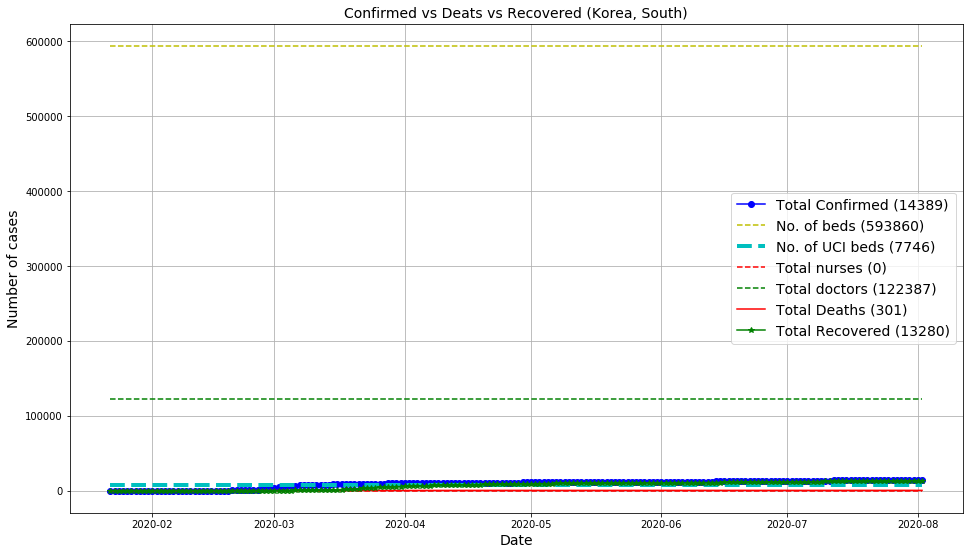

In [37]:
global_analisys("Korea, South",True)

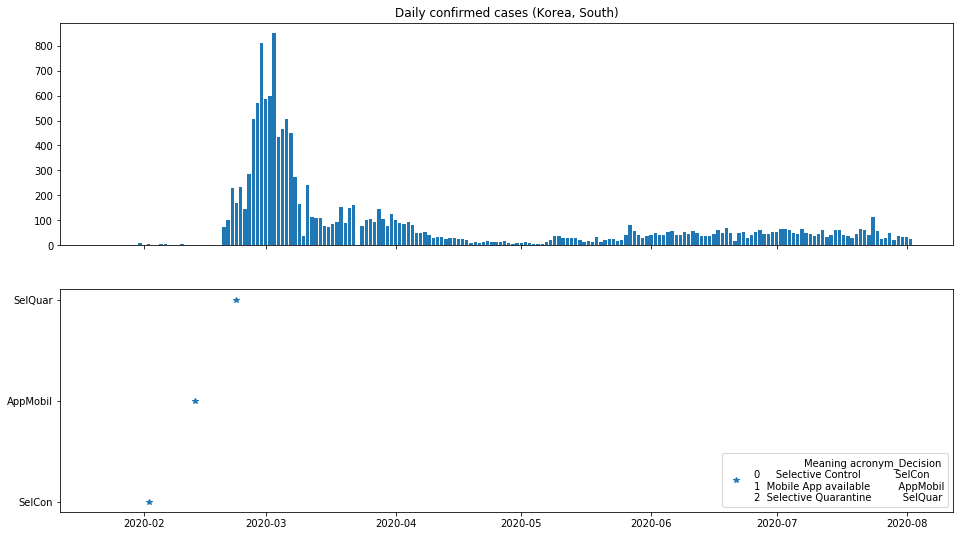

In [38]:
global_analisys("Korea, South",False,True)

### Portugal

It does not have sufficient health resources to treat patients with covid-19 and those with other diseases

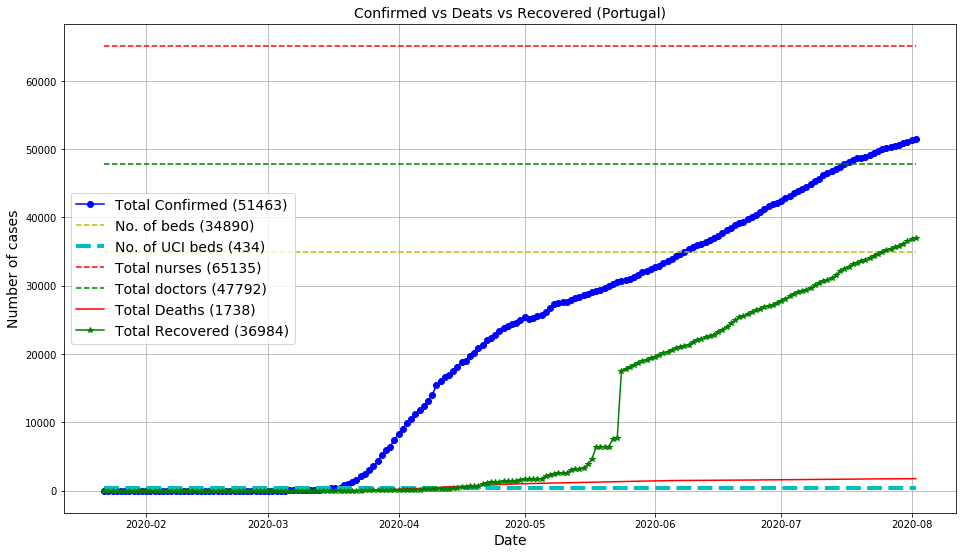

In [39]:
global_analisys("Portugal",True)

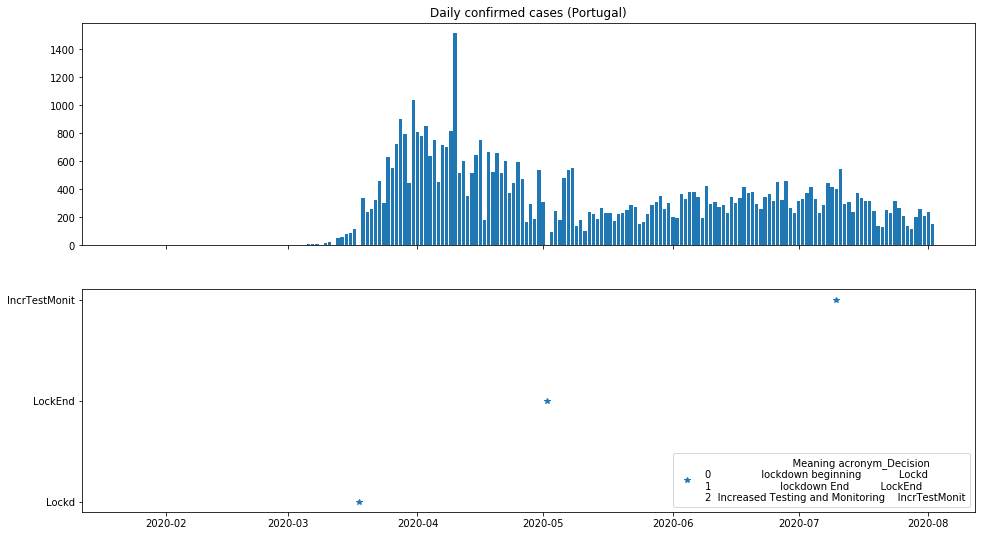

In [40]:
global_analisys("Portugal",False,True)

### United Kindom

It does not have sufficient health resources to treat patients with covid-19 and those with other diseases

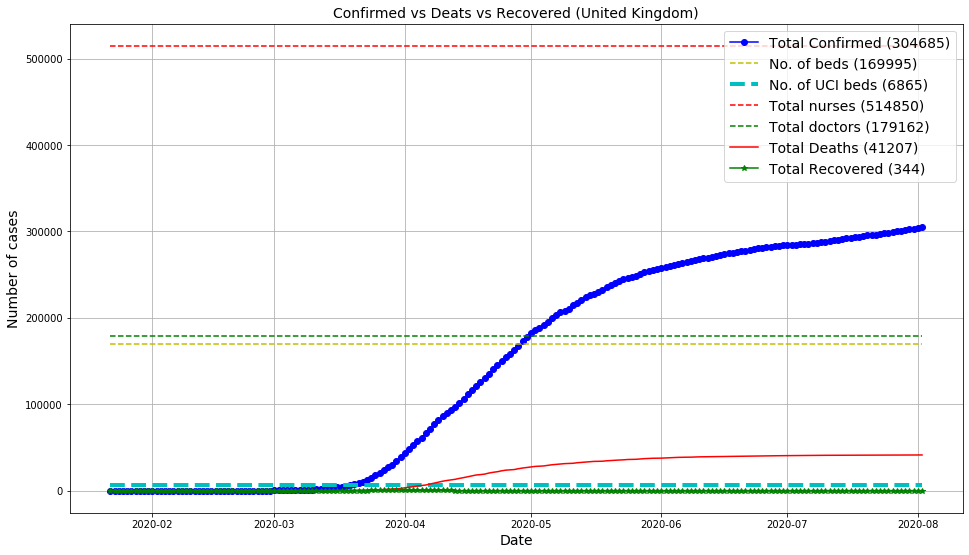

In [41]:
global_analisys("United Kingdom",True)

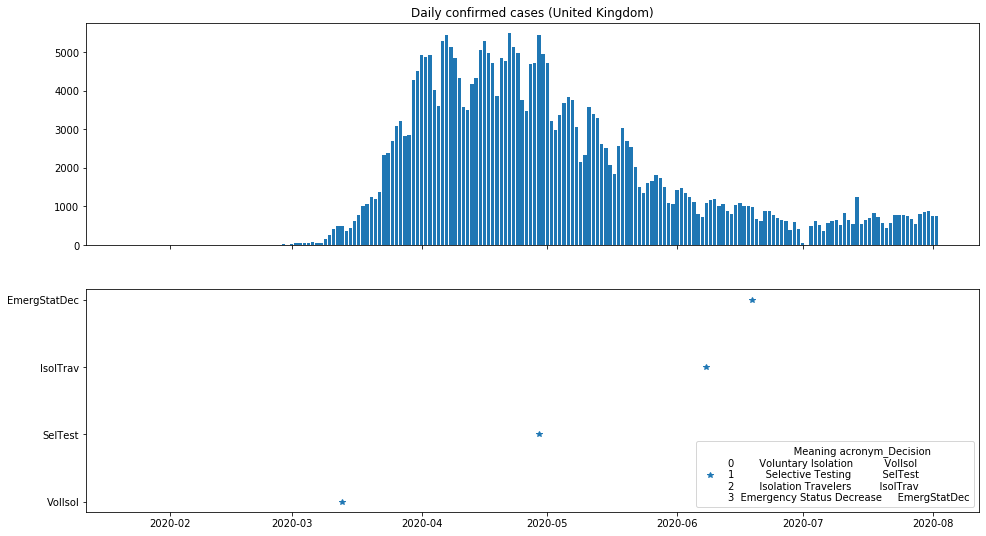

In [42]:
global_analisys("United Kingdom",False,True)